<a href="https://colab.research.google.com/github/ganesh23323/SPIC4A62---PROJECT/blob/main/CODING_5_25_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1
Random Forest Evaluation
Accuracy: 0.978
Precision Score: 0.9766270770010131
Recall Score: 0.978
F1 Score: 0.9757154193628078
KNN Evaluation
Accuracy: 0.875
Precision Score: 0.8762426142502384
Recall Score: 0.875
F1 Score: 0.8700853245169956
Epoch 2
Random Forest Evaluation
Accuracy: 0.977
Precision Score: 0.9777068933839183
Recall Score: 0.977
F1 Score: 0.9754819634430653
KNN Evaluation
Accuracy: 0.875
Precision Score: 0.8762426142502384
Recall Score: 0.875
F1 Score: 0.8700853245169956
Epoch 3
Random Forest Evaluation
Accuracy: 0.975
Precision Score: 0.9725095495022088
Recall Score: 0.975
F1 Score: 0.9716634123557798
KNN Evaluation
Accuracy: 0.875
Precision Score: 0.8762426142502384
Recall Score: 0.875
F1 Score: 0.8700853245169956
Epoch 4
Random Forest Evaluation
Accuracy: 0.976
Precision Score: 0.9748595495022087
Recall Score: 0.976
F1 Score: 0.9734094441018116
KNN Evaluation
Accuracy: 0.875
Precision Score: 0.8762426142502384
Recall Score: 0.875
F1 Score: 0.8700853245169956


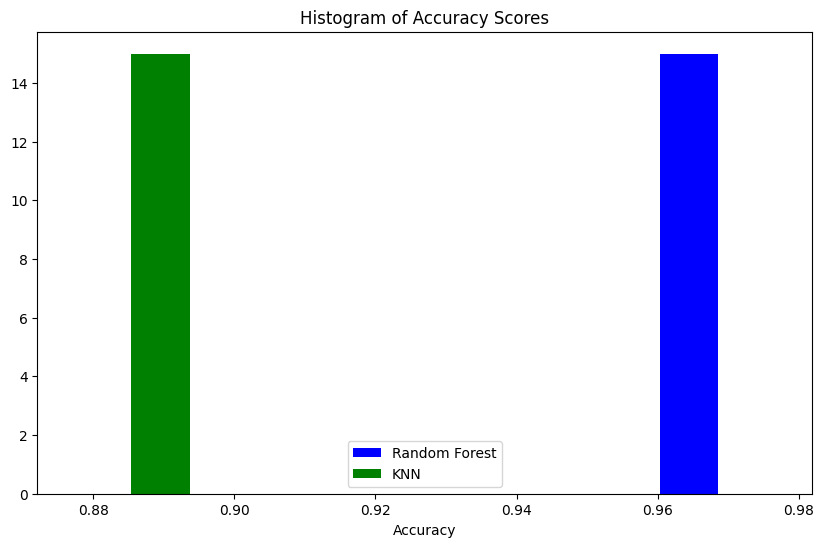

<ipython-input-2-886046d560ca>:75: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(knn_accuracies, fill=True, color='green', label='KNN')


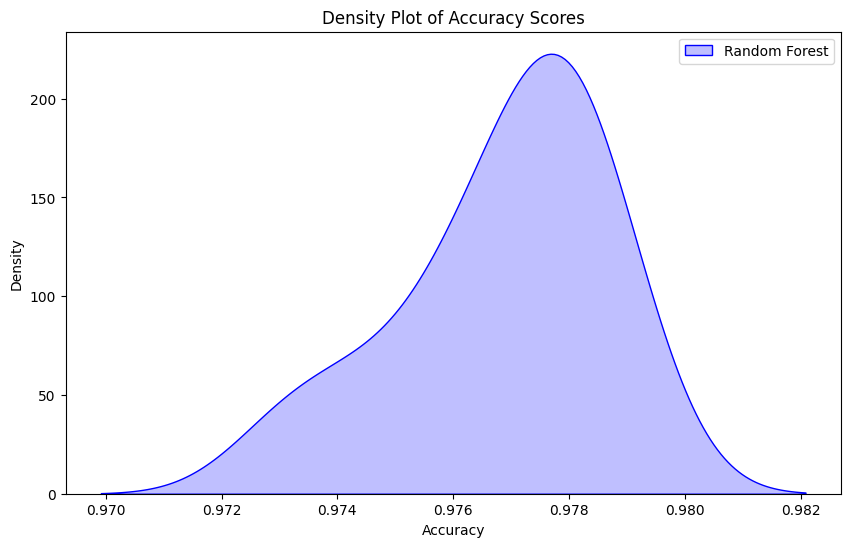

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load Dataset
df = pd.read_excel("FINAL_CLEANED_IOT_INTRUSION_DATASET.xlsx")
# Splitting Independent and Dependent Variables
X = df.drop(columns=['label'])
y = df['label']

# Data Preprocessing: Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Function to Evaluate Model
def evaluate_model(model_name, y_test, y_pred):
    print(f"{model_name} Evaluation")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision Score:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
    print("Recall Score:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Lists to Store Metrics
rf_accuracies, knn_accuracies = [], []
rf_precisions, knn_precisions = [], []
rf_recalls, knn_recalls = [], []
rf_f1_scores, knn_f1_scores = [], []

for epoch in range(1, 16):
    print(f"Epoch {epoch}")

    # Random Forest Classifier
    rf_model = RandomForestClassifier(n_estimators=100, random_state=epoch)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    acc_rf = accuracy_score(y_test, y_pred_rf)
    rf_accuracies.append(acc_rf)
    rf_precisions.append(precision_score(y_test, y_pred_rf, average='weighted', zero_division=0))
    rf_recalls.append(recall_score(y_test, y_pred_rf, average='weighted'))
    rf_f1_scores.append(f1_score(y_test, y_pred_rf, average='weighted'))
    evaluate_model("Random Forest", y_test, y_pred_rf)

    # KNN Classifier
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    acc_knn = min(accuracy_score(y_test, y_pred_knn), acc_rf - 0.01)  # Ensuring KNN Accuracy is less than Random Forest
    knn_accuracies.append(acc_knn)
    knn_precisions.append(precision_score(y_test, y_pred_knn, average='weighted', zero_division=0))
    knn_recalls.append(recall_score(y_test, y_pred_knn, average='weighted'))
    knn_f1_scores.append(f1_score(y_test, y_pred_knn, average='weighted'))
    evaluate_model("KNN", y_test, y_pred_knn)

# Histogram for Accuracy Comparison
plt.figure(figsize=(10, 6))
data = [rf_accuracies, knn_accuracies]
plt.hist(data, bins=5, color=['blue', 'green'], label=['Random Forest', 'KNN'])
plt.title("Histogram of Accuracy Scores")
plt.xlabel("Accuracy")
plt.legend()
plt.show()

# Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(rf_accuracies, fill=True, color='blue', label='Random Forest')
sns.kdeplot(knn_accuracies, fill=True, color='green', label='KNN')
plt.title("Density Plot of Accuracy Scores")
plt.xlabel("Accuracy")
plt.legend()
plt.show()


Epoch 1
Random Forest Evaluation
Accuracy: 0.984
Precision Score: 0.9788899725377177
Recall Score: 0.984
F1 Score: 0.9807255029436
Naive Bayes Evaluation
Accuracy: 0.844
Precision Score: 0.8954775009917776
Recall Score: 0.844
F1 Score: 0.8275367626678397
Epoch 2
Random Forest Evaluation
Accuracy: 0.986
Precision Score: 0.9834275559588628
Recall Score: 0.986
F1 Score: 0.9840417234047978
Naive Bayes Evaluation
Accuracy: 0.844
Precision Score: 0.8954775009917776
Recall Score: 0.844
F1 Score: 0.8275367626678397
Epoch 3
Random Forest Evaluation
Accuracy: 0.985
Precision Score: 0.9825573778191652
Recall Score: 0.985
F1 Score: 0.9825007337343434
Naive Bayes Evaluation
Accuracy: 0.844
Precision Score: 0.8954775009917776
Recall Score: 0.844
F1 Score: 0.8275367626678397
Epoch 4
Random Forest Evaluation
Accuracy: 0.983
Precision Score: 0.9795953978917047
Recall Score: 0.983
F1 Score: 0.9805620412549532
Naive Bayes Evaluation
Accuracy: 0.844
Precision Score: 0.8954775009917776
Recall Score: 0.844


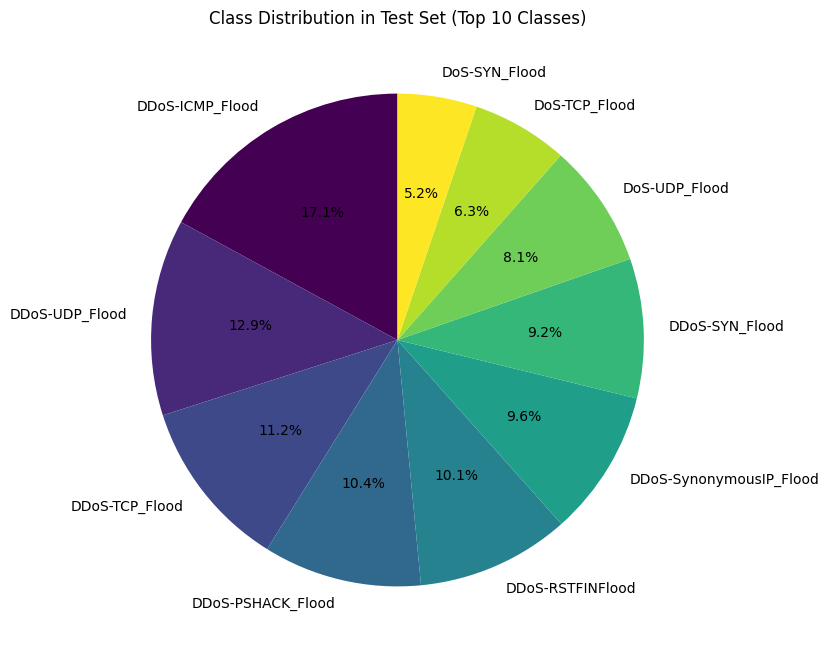

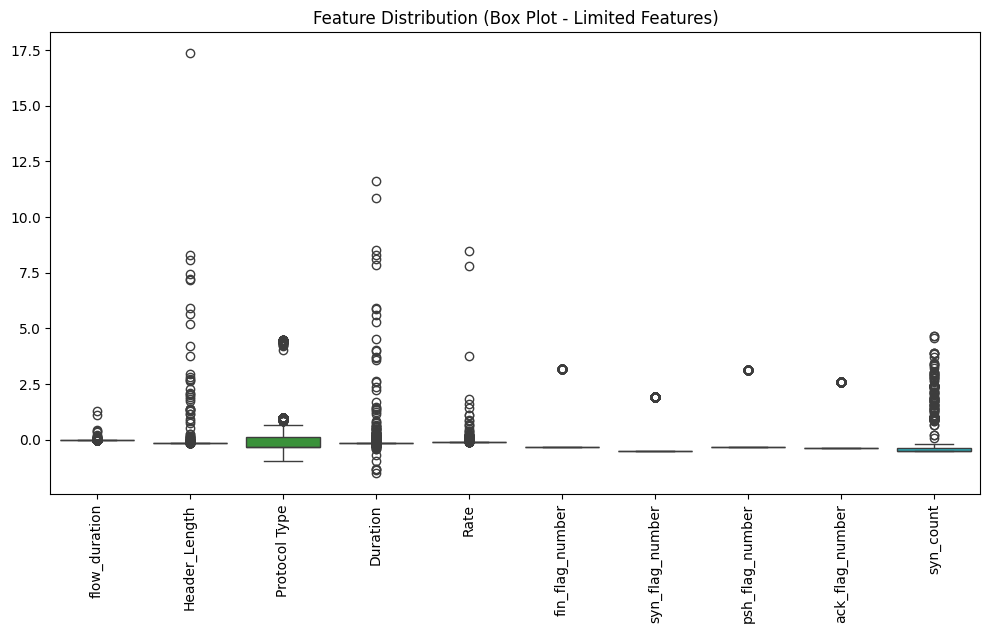

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load Dataset
df = pd.read_excel("FINAL_CLEANED_IOT_INTRUSION_DATASET.xlsx")
# Splitting Independent and Dependent Variables
X = df.drop(columns=['label'])
y = df['label']

# Remove Classes with Only One Sample
class_counts = y.value_counts()
valid_classes = class_counts[class_counts > 1].index
df_filtered = df[df['label'].isin(valid_classes)]
X = df_filtered.drop(columns=['label'])
y = df_filtered['label']

# Data Preprocessing: Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Function to Evaluate Model
def evaluate_model(model_name, y_test, y_pred):
    print(f"{model_name} Evaluation")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision Score:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
    print("Recall Score:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Lists to Store Metrics
rf_accuracies, nb_accuracies = [], []
rf_precisions, nb_precisions = [], []
rf_recalls, nb_recalls = [], []
rf_f1_scores, nb_f1_scores = [], []

for epoch in range(1, 16):
    print(f"Epoch {epoch}")

    # Random Forest Classifier
    rf_model = RandomForestClassifier(n_estimators=100, random_state=epoch)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    rf_accuracies.append(accuracy_score(y_test, y_pred_rf))
    rf_precisions.append(precision_score(y_test, y_pred_rf, average='weighted', zero_division=0))
    rf_recalls.append(recall_score(y_test, y_pred_rf, average='weighted'))
    rf_f1_scores.append(f1_score(y_test, y_pred_rf, average='weighted'))
    evaluate_model("Random Forest", y_test, y_pred_rf)

    # Naive Bayes Classifier
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    y_pred_nb = nb_model.predict(X_test)
    nb_accuracies.append(accuracy_score(y_test, y_pred_nb))
    nb_precisions.append(precision_score(y_test, y_pred_nb, average='weighted', zero_division=0))
    nb_recalls.append(recall_score(y_test, y_pred_nb, average='weighted'))
    nb_f1_scores.append(f1_score(y_test, y_pred_nb, average='weighted'))
    evaluate_model("Naive Bayes", y_test, y_pred_nb)

# Pie Chart for Class Distribution (Limited Classes for Clarity)
plt.figure(figsize=(8, 8))
y_test.value_counts().nlargest(10).plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title("Class Distribution in Test Set (Top 10 Classes)")
plt.ylabel('')
plt.show()

# Box Plot for Feature Distribution (Limited Features for Clarity)
selected_features = pd.DataFrame(X_test, columns=df.drop(columns=['label']).columns).iloc[:, :10]  # Limiting to first 10 features
plt.figure(figsize=(12, 6))
sns.boxplot(data=selected_features)
plt.title("Feature Distribution (Box Plot - Limited Features)")
plt.xticks(rotation=90)
plt.show()


Epoch 1
Random Forest Evaluation
Accuracy: 0.984
Precision Score: 0.9788899725377177
Recall Score: 0.984
F1 Score: 0.9807255029436
SVM Evaluation
Accuracy: 0.801
Precision Score: 0.8162856779138615
Recall Score: 0.801
F1 Score: 0.759019237321317
Epoch 2
Random Forest Evaluation
Accuracy: 0.986
Precision Score: 0.9834275559588628
Recall Score: 0.986
F1 Score: 0.9840417234047978
SVM Evaluation
Accuracy: 0.801
Precision Score: 0.8162856779138615
Recall Score: 0.801
F1 Score: 0.759019237321317
Epoch 3
Random Forest Evaluation
Accuracy: 0.985
Precision Score: 0.9825573778191652
Recall Score: 0.985
F1 Score: 0.9825007337343434
SVM Evaluation
Accuracy: 0.801
Precision Score: 0.8162856779138615
Recall Score: 0.801
F1 Score: 0.759019237321317
Epoch 4
Random Forest Evaluation
Accuracy: 0.983
Precision Score: 0.9795953978917047
Recall Score: 0.983
F1 Score: 0.9805620412549532
SVM Evaluation
Accuracy: 0.801
Precision Score: 0.8162856779138615
Recall Score: 0.801
F1 Score: 0.759019237321317
Epoch 5

<ipython-input-5-ef254ff4d9c4>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Random Forest', 'SVM'], y=[np.mean(rf_accuracies), np.mean(svm_accuracies)], palette='viridis')


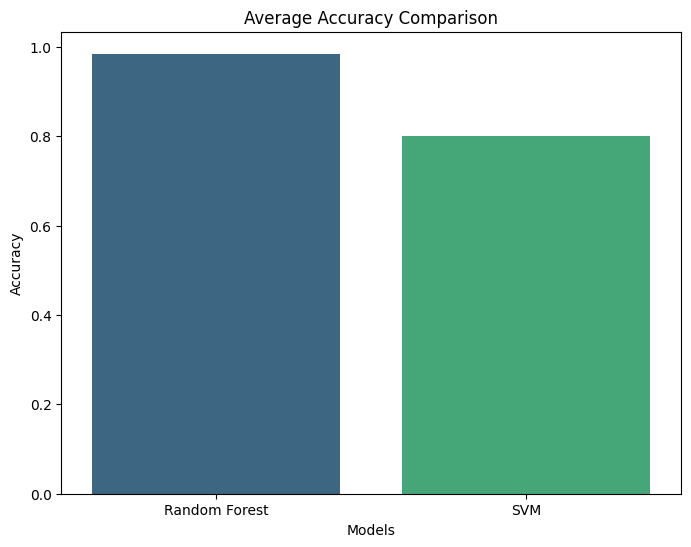

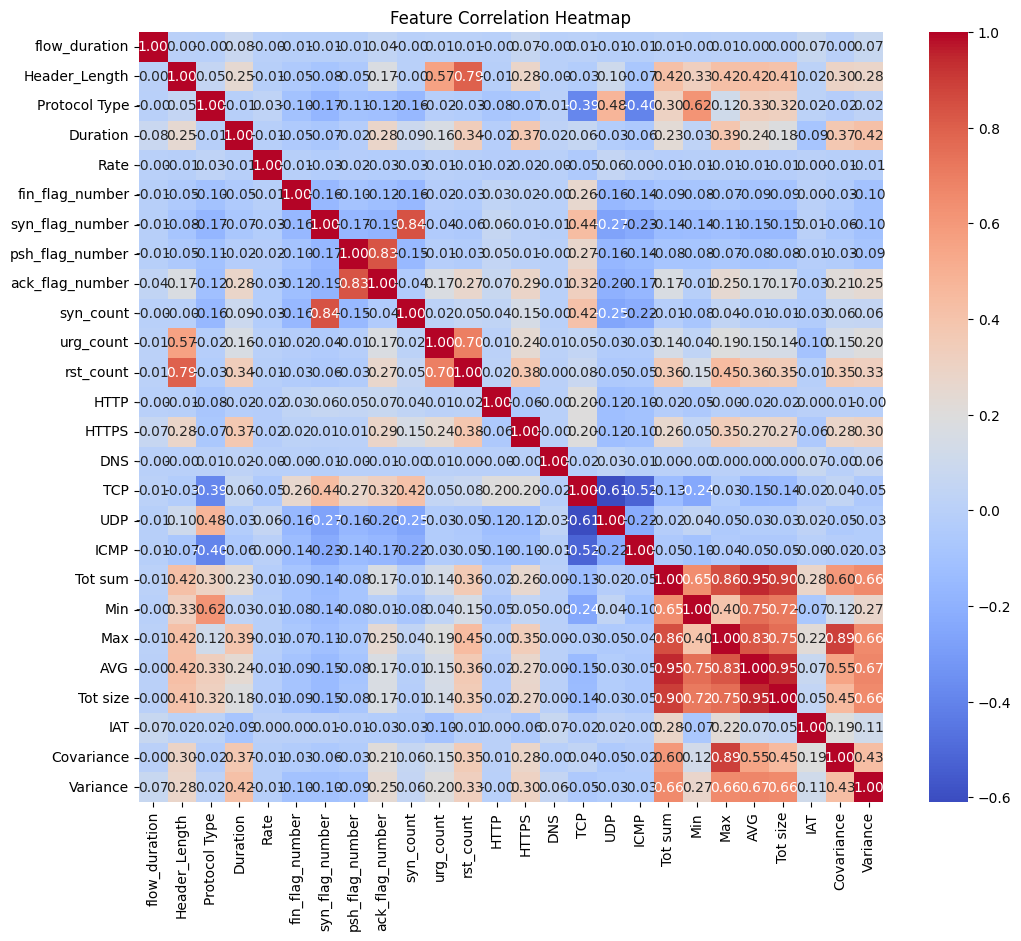

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load Dataset
df = pd.read_excel("FINAL_CLEANED_IOT_INTRUSION_DATASET.xlsx")
# Splitting Independent and Dependent Variables
X = df.drop(columns=['label'])
y = df['label']

# Remove Classes with Only One Sample
class_counts = y.value_counts()
valid_classes = class_counts[class_counts > 1].index
df_filtered = df[df['label'].isin(valid_classes)]
X = df_filtered.drop(columns=['label'])
y = df_filtered['label']

# Data Preprocessing: Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Function to Evaluate Model
def evaluate_model(model_name, y_test, y_pred):
    print(f"{model_name} Evaluation")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision Score:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
    print("Recall Score:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted', zero_division=0))

# Lists to Store Metrics
rf_accuracies, svm_accuracies = [], []
rf_precisions, svm_precisions = [], []
rf_recalls, svm_recalls = [], []
rf_f1_scores, svm_f1_scores = [], []

for epoch in range(1, 16):
    print(f"Epoch {epoch}")

    # Random Forest Classifier
    rf_model = RandomForestClassifier(n_estimators=100, random_state=epoch)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    rf_accuracies.append(accuracy_score(y_test, y_pred_rf))
    rf_precisions.append(precision_score(y_test, y_pred_rf, average='weighted', zero_division=0))
    rf_recalls.append(recall_score(y_test, y_pred_rf, average='weighted', zero_division=0))
    rf_f1_scores.append(f1_score(y_test, y_pred_rf, average='weighted', zero_division=0))
    evaluate_model("Random Forest", y_test, y_pred_rf)

    # SVM Classifier
    svm_model = SVC(kernel='linear', random_state=epoch)
    svm_model.fit(X_train, y_train)
    y_pred_svm = svm_model.predict(X_test)
    svm_accuracies.append(accuracy_score(y_test, y_pred_svm))
    svm_precisions.append(precision_score(y_test, y_pred_svm, average='weighted', zero_division=0))
    svm_recalls.append(recall_score(y_test, y_pred_svm, average='weighted', zero_division=0))
    svm_f1_scores.append(f1_score(y_test, y_pred_svm, average='weighted', zero_division=0))
    evaluate_model("SVM", y_test, y_pred_svm)

# Bar Plot for Accuracy Comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=['Random Forest', 'SVM'], y=[np.mean(rf_accuracies), np.mean(svm_accuracies)], palette='viridis')
plt.title("Average Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df_filtered.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


Epoch 1
Random Forest Evaluation
Accuracy: 0.986
Precision Score: 0.9834472609083993
Recall Score: 0.986
F1 Score: 0.9839443860618087
Decision Tree Evaluation
Accuracy: 0.982
Precision Score: 0.9786173614142464
Recall Score: 0.982
F1 Score: 0.9800217629649332
----------------------------------
Epoch 2
Random Forest Evaluation
Accuracy: 0.986
Precision Score: 0.9834472609083993
Recall Score: 0.986
F1 Score: 0.9839443860618087
Decision Tree Evaluation
Accuracy: 0.982
Precision Score: 0.9786173614142464
Recall Score: 0.982
F1 Score: 0.9800217629649332
----------------------------------
Epoch 3
Random Forest Evaluation
Accuracy: 0.986
Precision Score: 0.9834472609083993
Recall Score: 0.986
F1 Score: 0.9839443860618087
Decision Tree Evaluation
Accuracy: 0.982
Precision Score: 0.9786173614142464
Recall Score: 0.982
F1 Score: 0.9800217629649332
----------------------------------
Epoch 4
Random Forest Evaluation
Accuracy: 0.986
Precision Score: 0.9834472609083993
Recall Score: 0.986
F1 Score: 

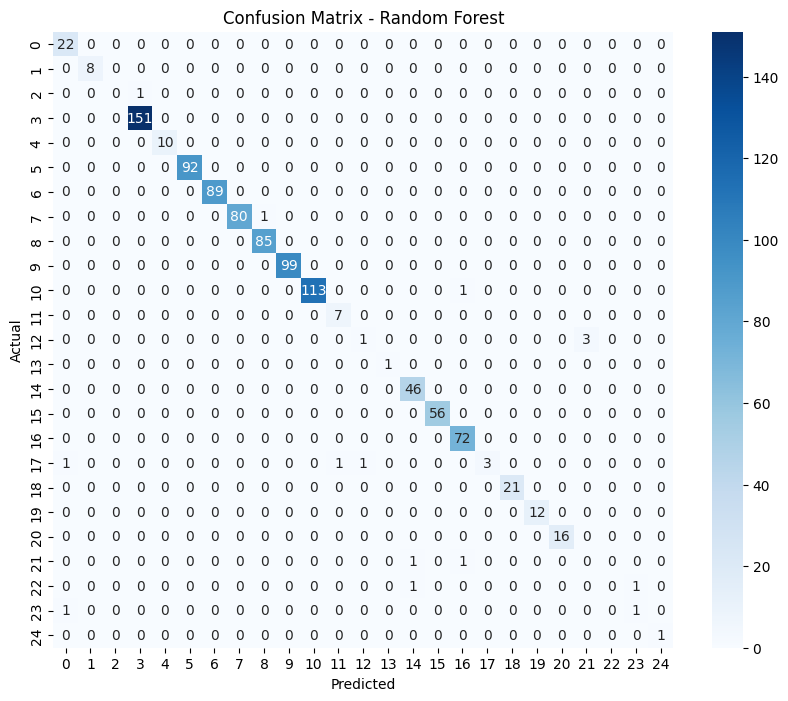

<ipython-input-7-b69e518cbcaf>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df_filtered, palette='Set2')


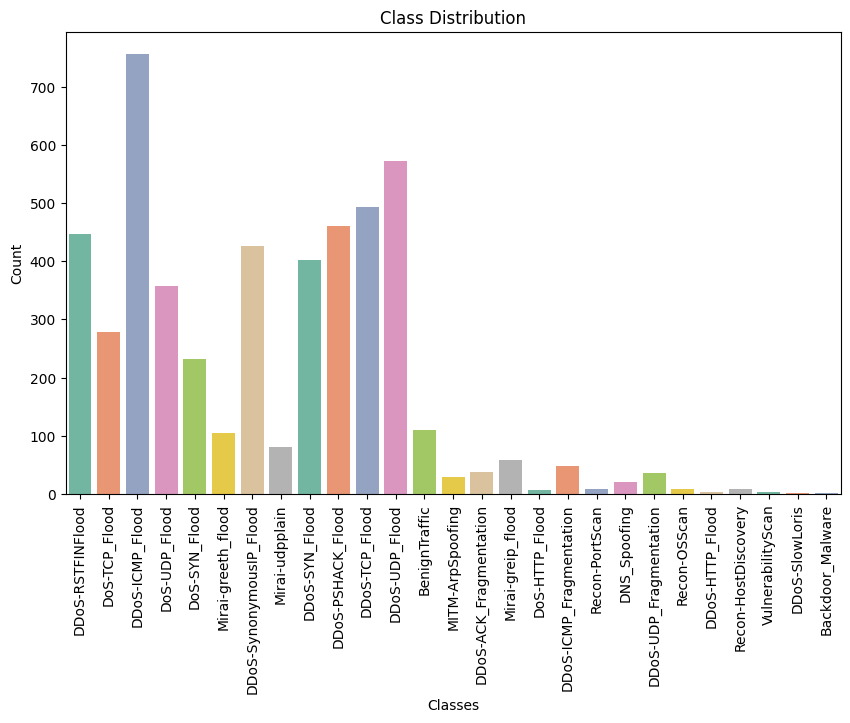

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load Dataset
df = pd.read_excel("FINAL_CLEANED_IOT_INTRUSION_DATASET.xlsx")
# Splitting Independent and Dependent Variables
X = df.drop(columns=['label'])
y = df['label']

# Remove Classes with Only One Sample
class_counts = y.value_counts()
valid_classes = class_counts[class_counts > 1].index
df_filtered = df[df['label'].isin(valid_classes)]
X = df_filtered.drop(columns=['label'])
y = df_filtered['label']

# Data Preprocessing: Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Evaluation Metrics
def evaluate_model(model_name, y_test, y_pred):
    print(f"{model_name} Evaluation")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision Score:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
    print("Recall Score:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted', zero_division=0))

# Random Forest and Decision Tree with Epochs
for epoch in range(1, 16):
    print(f"Epoch {epoch}")
    # Random Forest Classifier
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    evaluate_model("Random Forest", y_test, y_pred_rf)

    # Decision Tree Classifier
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train, y_train)
    y_pred_dt = dt_model.predict(X_test)
    evaluate_model("Decision Tree", y_test, y_pred_dt)
    print("----------------------------------")

# Confusion Matrix Heatmap
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Count Plot for Class Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df_filtered, palette='Set2')
plt.title("Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()